In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch 
from torch.autograd import Variable 

In [2]:
data = pd.read_csv('MLP_regresion.csv')

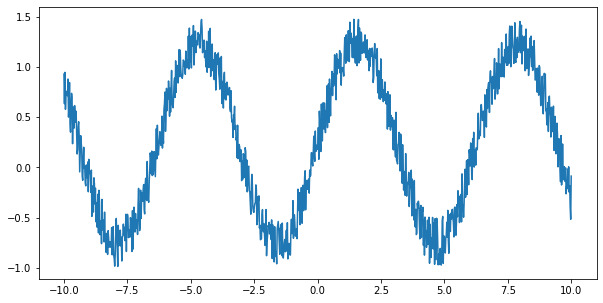

In [3]:
fig = plt.figure(figsize=(10,5))
plt.plot(data['X'], data['Y'])
plt.show()

In [4]:
x = data['X'].values
y = data['Y'].values
x = Variable(torch.from_numpy(x)).float()
X = torch.unsqueeze(x,dim=1)
y = Variable(torch.from_numpy(y)).float()
Y = torch.unsqueeze(y,dim=1)

In [5]:
## Modelo 1 
input_dim = 1 
model1 = torch.nn.Sequential(
    torch.nn.Linear(input_dim,25),
    torch.nn.LogSigmoid(),
    torch.nn.Linear(25,15),
    torch.nn.LogSigmoid(),
    torch.nn.Linear(15,input_dim)
)

In [6]:
## Modelo 2
input_dim = 1 
model2 = torch.nn.Sequential(
    torch.nn.Linear(input_dim,25),
    torch.nn.LogSigmoid(),
    torch.nn.Linear(25,15),
    torch.nn.LogSigmoid(),
    torch.nn.Linear(15,10),
    torch.nn.ReLU(),
    torch.nn.Linear(10,input_dim)
)

In [7]:
optimizer1 = torch.optim.SGD(model1.parameters(),lr = 0.01)
optimizer2 = torch.optim.SGD(model2.parameters(),lr = 0.01)
criterion1 = torch.nn.MSELoss()
criterion2 = torch.nn.MSELoss()

Epoch: 1, loss: 1.3545843362808228


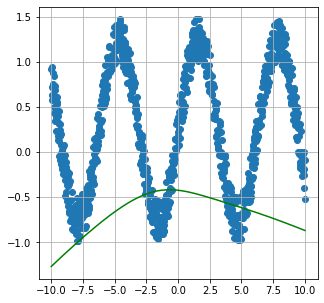

Epoch: 1001, loss: 0.46366459131240845


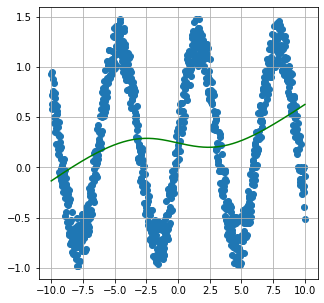

Epoch: 2001, loss: 0.4611263573169708


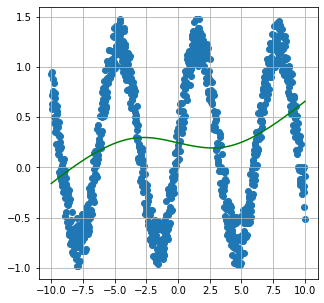

Epoch: 3001, loss: 0.45798027515411377


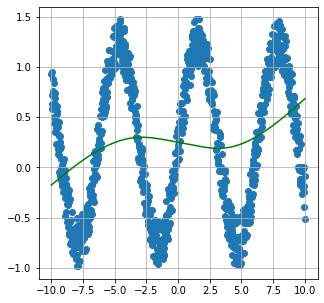

Epoch: 4001, loss: 0.45219650864601135


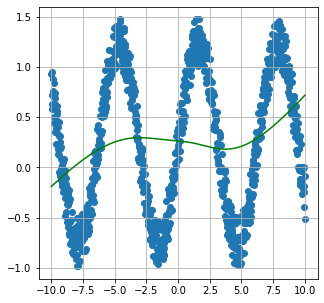

Epoch: 5001, loss: 0.4380888044834137


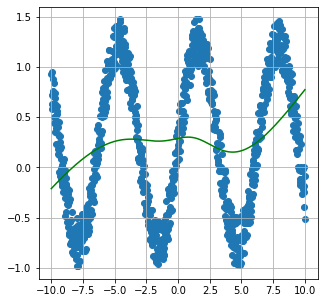

Epoch: 6001, loss: 0.595450758934021


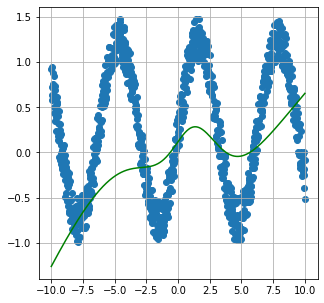

Epoch: 7001, loss: 0.31338489055633545


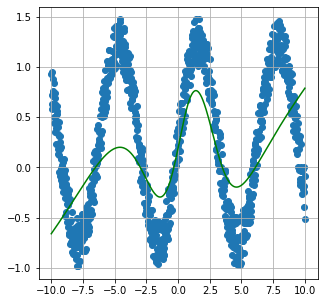

Epoch: 8001, loss: 0.1844026893377304


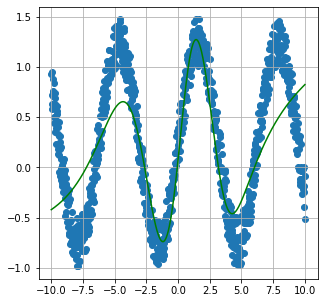

Epoch: 9001, loss: 0.1531084030866623


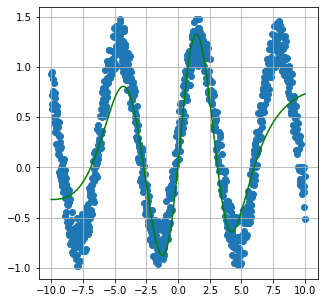

Epoch: 10001, loss: 0.13814127445220947


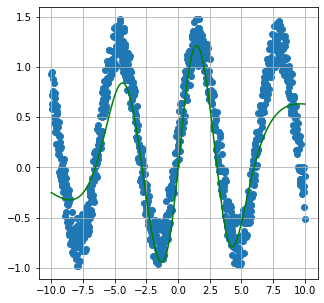

Epoch: 11001, loss: 0.1312440037727356


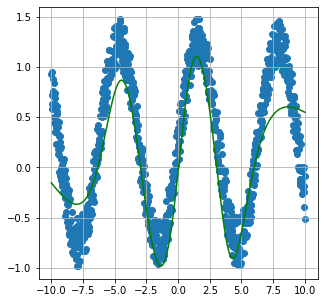

Epoch: 12001, loss: 0.12308500707149506


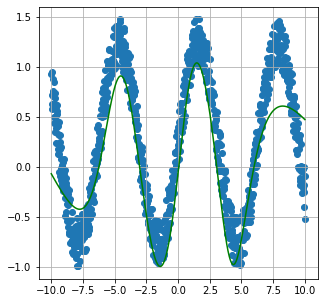

Epoch: 13001, loss: 0.11456221342086792


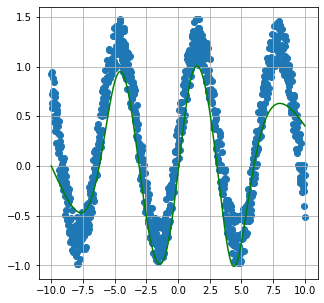

Epoch: 14001, loss: 0.10639595985412598


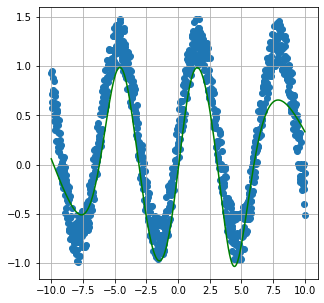

Epoch: 15001, loss: 0.09885204583406448


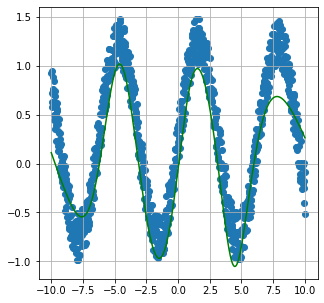

Epoch: 16001, loss: 0.09175772964954376


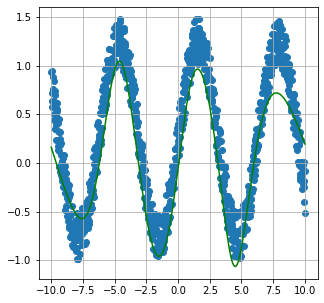

Epoch: 17001, loss: 0.08494451642036438


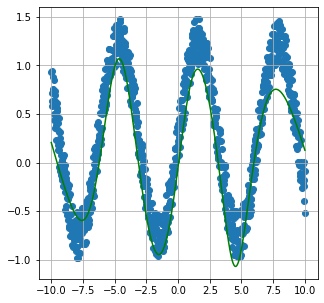

Epoch: 18001, loss: 0.07836280018091202


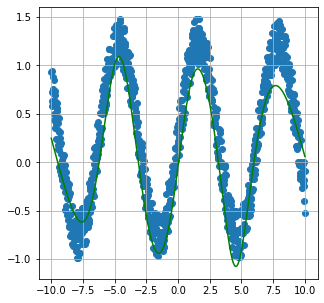

Epoch: 19001, loss: 0.07206857949495316


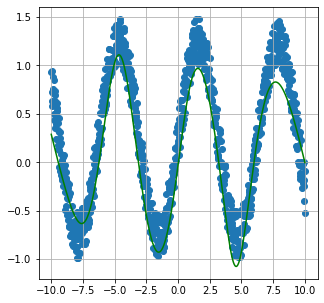

Epoch: 20001, loss: 0.06616106629371643


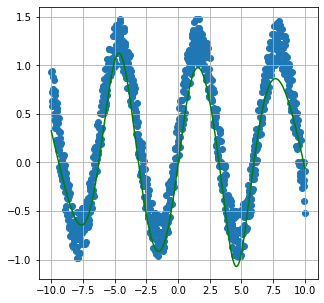

Epoch: 21001, loss: 0.06073956936597824


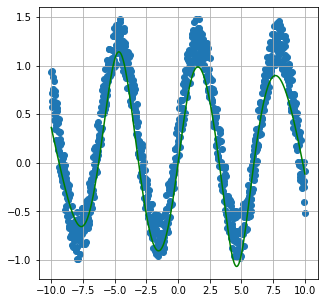

Epoch: 22001, loss: 0.0558558814227581


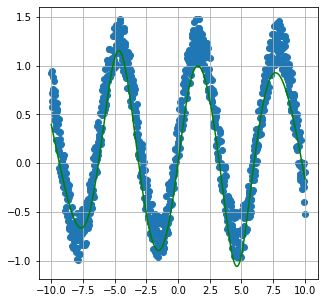

Epoch: 23001, loss: 0.05152026191353798


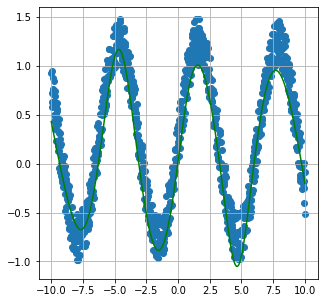

Epoch: 24001, loss: 0.047714993357658386


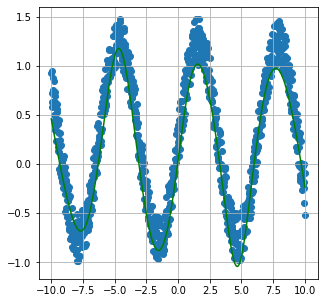

Epoch: 25001, loss: 0.04439070448279381


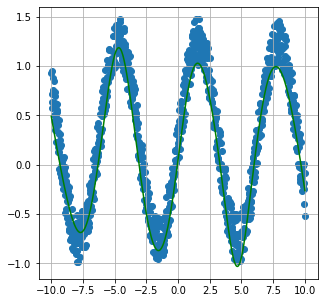

In [8]:
n_epoch = 25501

loss1 = []
for epoch in range(n_epoch):
    pred1 = model1(X)
    z = criterion1(pred1,Y)
    loss1.append(z.item())
    optimizer1.zero_grad()
    z.backward()
    optimizer1.step()
    if (epoch%1000==0):
        print('Epoch: {}, loss: {}'.format(epoch+1,z.item()))
        fig = plt.figure(figsize=(5,5))
        plt.scatter(X.data.numpy(), Y.data.numpy())
        plt.plot(X.data.numpy(), pred1.data.numpy(),'g-')
        plt.grid()
        plt.show()

Epoch: 1, loss: 0.5583269000053406


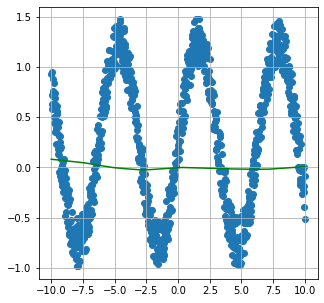

Epoch: 1001, loss: 0.5583269000053406


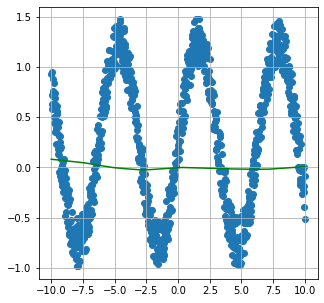

Epoch: 2001, loss: 0.5583269000053406


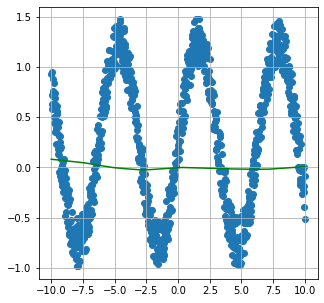

Epoch: 3001, loss: 0.5583269000053406


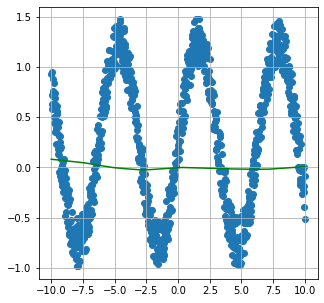

Epoch: 4001, loss: 0.5583269000053406


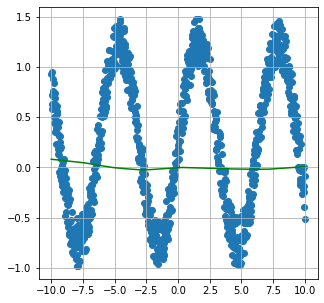

Epoch: 5001, loss: 0.5583269000053406


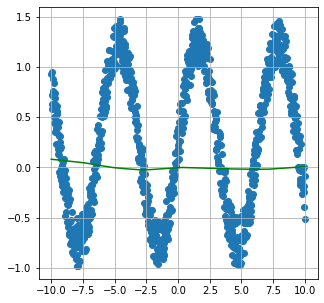

Epoch: 6001, loss: 0.5583269000053406


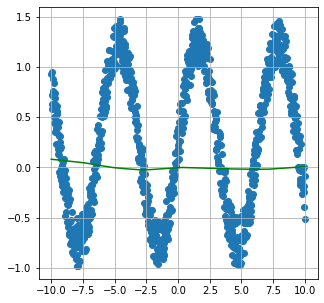

Epoch: 7001, loss: 0.5583269000053406


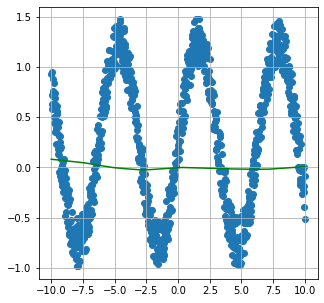

Epoch: 8001, loss: 0.5583269000053406


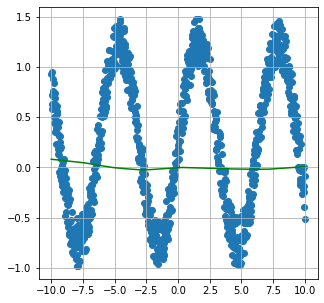

Epoch: 9001, loss: 0.5583269000053406


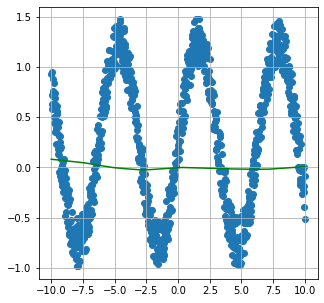

Epoch: 10001, loss: 0.5583269000053406


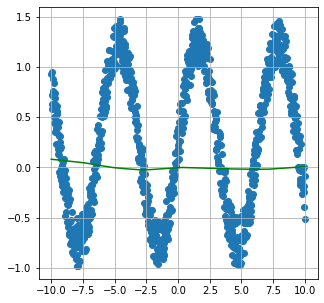

Epoch: 11001, loss: 0.5583269000053406


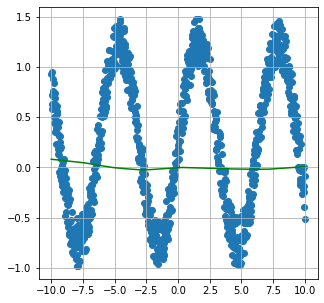

Epoch: 12001, loss: 0.5583269000053406


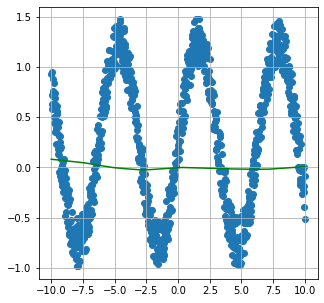

Epoch: 13001, loss: 0.5583269000053406


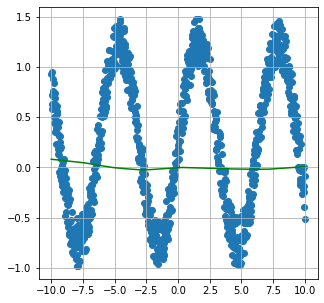

Epoch: 14001, loss: 0.5583269000053406


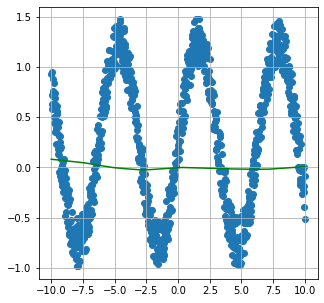

Epoch: 15001, loss: 0.5583269000053406


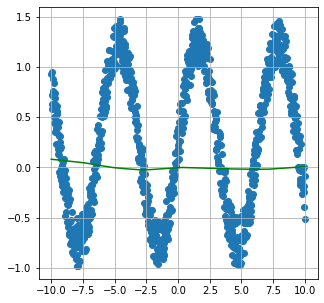

Epoch: 16001, loss: 0.5583269000053406


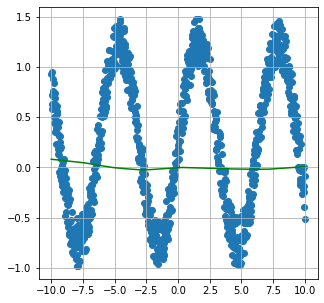

Epoch: 17001, loss: 0.5583269000053406


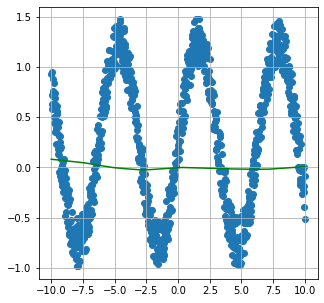

Epoch: 18001, loss: 0.5583269000053406


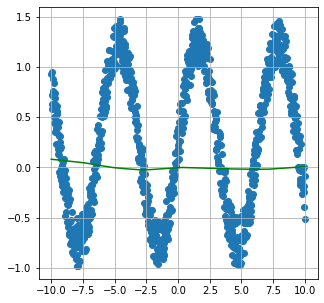

Epoch: 19001, loss: 0.5583269000053406


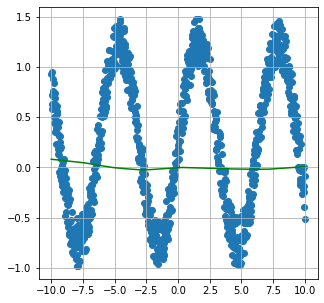

Epoch: 20001, loss: 0.5583269000053406


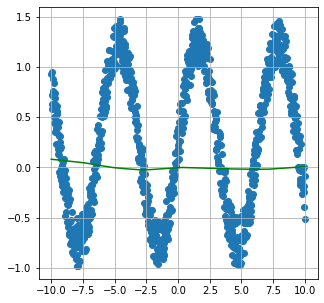

Epoch: 21001, loss: 0.5583269000053406


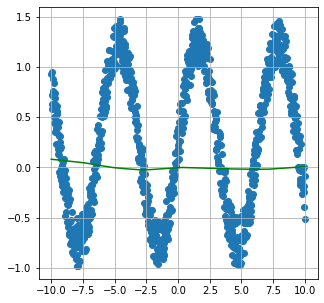

Epoch: 22001, loss: 0.5583269000053406


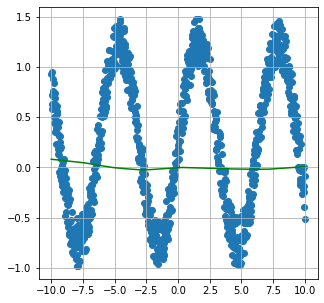

Epoch: 23001, loss: 0.5583269000053406


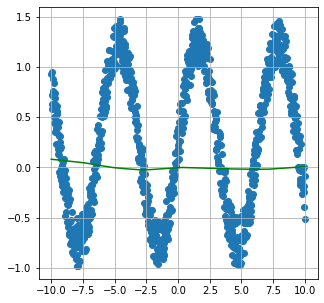

Epoch: 24001, loss: 0.5583269000053406


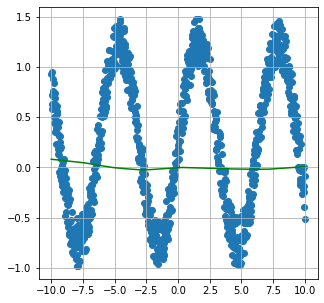

Epoch: 25001, loss: 0.5583269000053406


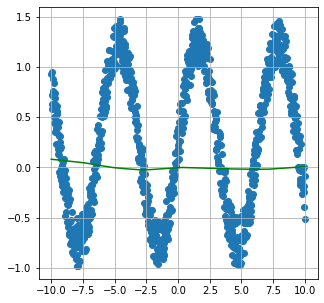

In [9]:
n_epoch = 25501

loss2 = []
for epoch in range(n_epoch):
    pred2 = model2(X)
    z = criterion2(pred2,Y)
    loss2.append(z.item())
    optimizer2.zero_grad()
    z.backward()
    optimizer1.step()
    if (epoch%1000==0):
        print('Epoch: {}, loss: {}'.format(epoch+1,z.item()))
        fig = plt.figure(figsize=(5,5))
        plt.scatter(X.data.numpy(), Y.data.numpy())
        plt.plot(X.data.numpy(), pred2.data.numpy(),'g-')
        plt.grid()
        plt.show()

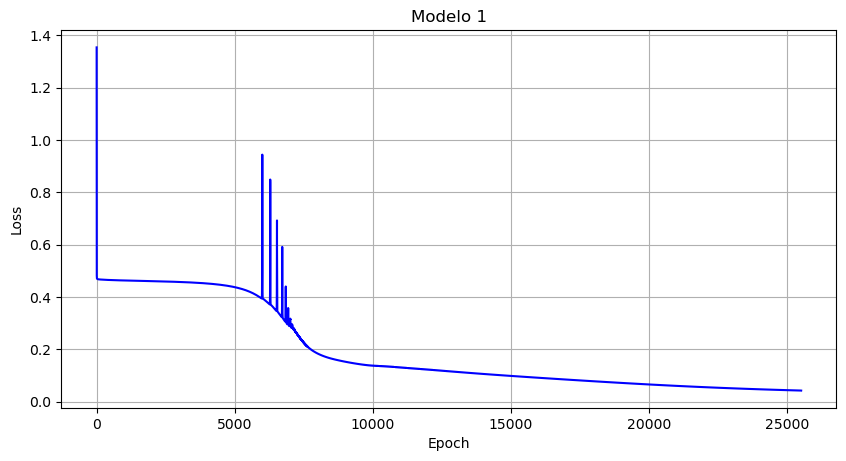

In [16]:
fig = plt.figure(figsize=(10,5),dpi=100)
plt.title('Modelo 1')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.plot(loss1,'b-')
plt.show()

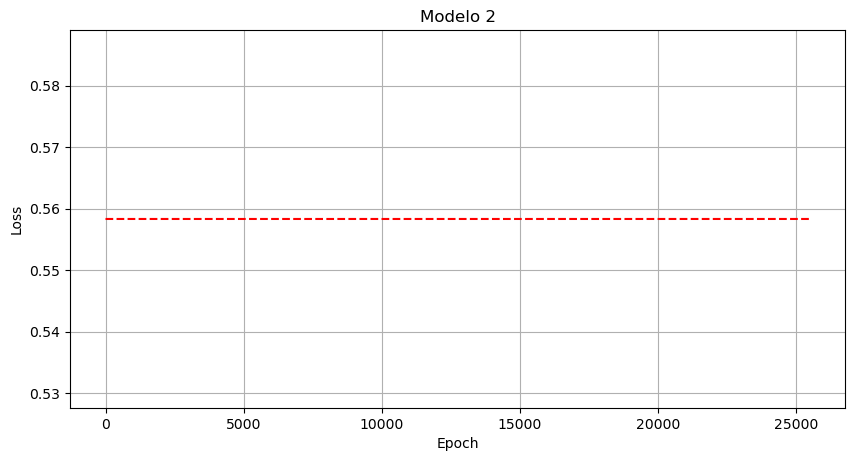

In [17]:
fig = plt.figure(figsize=(10,5),dpi=100)
plt.title('Modelo 2')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.plot(loss2,'r--')
plt.show()

# Descripción y conclusiones

## Modelo 1 
El modelo 1 tiene tres capas, la primera con una entrada y 25 salidas, la segunda con 15 salidas y la última con una sola salida. Todas las neuronas están conectadas linealmente. Las capas interiores tienen una misma función de activación, logaritmo sigmoide. Se entrenó con una taza de entrenamiento de 0.01, y se obtuvo un muy buen resultado de un error cuadrático medio de 0.04. En la gráfica de perdida se evidencia un comportamiento mayormente decreciente, sin embargo, alrededor de la epoca 6000-7000 se ve un comportamiento anómalo en el que la pérdida aumentó, generando que el modelo perdiera precisión. Luego de este bache, el modelo siguió decreciendo. 

## Modelo 2
El modelo 2 se fundamentó en el modelo 1, aumentando el numero de capas, y redistribuyendo la cantidad de neuronas con una cpaa intermedia entre la penúltima y la última. La última capa se diseñó con una función de activación RELU. Este modelo nunca redujo su pérdida, lo cual pudo pasar por dos motivos: primero, la función de activación RELU elimina valores negativos, lo cual indica que para poder caracterizar una situación donde los valores negativos sean de importancia es necesaria una función de activación que discrimine los valores negativos. Segundo, por overfitting. La cantidad de parámetros adicionales en el modelo generan un efecto de overfitting que genera que el modelo no funcione. 

